In [14]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt 
#%matplotlib inline

In [15]:
housing = pd.read_csv("housing_prices.csv")


In [3]:
housing.shape

(1460, 81)

In [16]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Exploratory Analysis

### Univariate

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


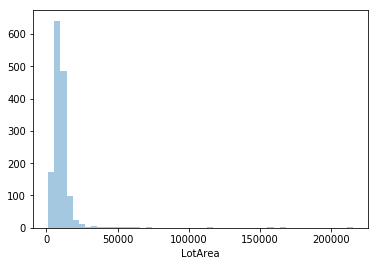

In [17]:
# Analyze the spread of the "LotArea" column

sns.distplot(housing["LotArea"], kde=False)

### y axis is the count for each bin
### x is the actual bin of lot area

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


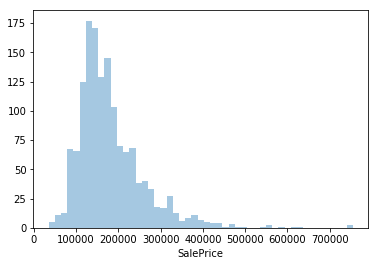

In [18]:
sns.distplot(housing["SalePrice"], kde=False)

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


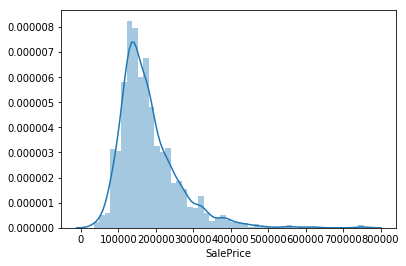

In [19]:
### KDE IS KERNEL DENSITY ESTIMATOR
### GIVES THE DISTRIBUTION
### Y axis is the proportion of data and not count inside the kde line.
sns.distplot(housing["SalePrice"], kde=True)

In [12]:
##sns.boxplot(x="SalePrice", y="total_bill", data=housing,palette='rainbow')

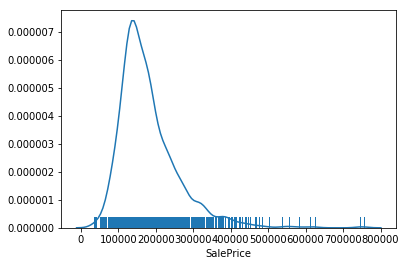

In [13]:
sns.distplot(housing["SalePrice"], rug=True,hist=False)

Pandas dataframe.quantile() function return values at the given quantile over requested axis, a numpy.percentile.

Syntax: DataFrame.quantile(q=0.5, axis=0, numeric_only=True, interpolation=’linear’)

Parameters : 
q : float or array-like, default 0.5 (50% quantile). 0 <= q <= 1, the quantile(s) to compute
axis : [{0, 1, ‘index’, ‘columns’} (default 0)] 0 or ‘index’ for row-wise, 1 or ‘columns’ for column-wise
numeric_only : If False, the quantile of datetime and timedelta data will be computed as well
interpolatoin : {‘linear’, ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’}

Returns : quantiles : Series or DataFrame
-> If q is an array, a DataFrame will be returned where the index is q, the columns are the columns of self, and the values are the quantiles.
-> If q is a float, a Series will be returned where the index is the columns of self and the values are the quantiles.

In [ ]:
# Are outliers skewing the relationship.. 
housing["LotArea"].quantile([0.5,0.95,0.99])
## 

In [ ]:
##Redraw the relationshp after removing very large values/outlier
housing["LotArea"].quantile([0.5,0.95,0.99])
housing_sub = housing.loc[housing["LotArea"] < housing["LotArea"].quantile(0.95)]

In [ ]:
### rerun distplot
sns.distplot(housing["SalePrice"], kde=False)

In [ ]:
print(housing['LotArea'].min())
print(housing['LotArea'].max())
print(housing['LotArea'].std())



In [ ]:
### count of values for a particular column
housing['Exterior1st'].value_counts()


In [ ]:
# What are the different types of housing exterios

plot = sns.countplot(x = "Exterior1st", data = housing)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

In [ ]:
### ordering the plot using value count which will give count of
### from the sorted data we use .index to sort
plot = sns.countplot(x = "Exterior1st",data=housing,order=housing['Exterior1st'].value_counts(ascending=True).index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

In [ ]:
### change the axis
### from the sorted data we use .index to sort
plot = sns.countplot(y = "Exterior1st",data=housing,order=housing['Exterior1st'].value_counts(ascending=True).index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

In [ ]:
### ordering the plot..ordering without indexing the value counts will not result in a plot
plot = sns.countplot(x = "Exterior1st",data=housing,order=housing['Exterior1st'].value_counts())
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

https://upload.wikimedia.org/wikipedia/commons/1/1a/Boxplot_vs_PDF.svg

In [ ]:
sns.boxplot(data=housing["SalePrice"],palette='rainbow',orient='h')

### Bi-variate Analysis

<b> Q: Does the price of the house depend on the lot area? </b>

In [ ]:
sns.regplot(x = "LotArea", y = "SalePrice", data = housing)

In [ ]:
sns.barplot(x='SaleCondition',y='SalePrice',data=housing)

In [ ]:
# Are outliers skewing the relationship.. 
housing["LotArea"].quantile([0.5,0.95,0.99])
## 

In [ ]:
##Redraw the relationshp after removing very large values/outlier
housing["LotArea"].quantile([0.5,0.95,0.99])
housing_sub = housing.loc[housing["LotArea"] < housing["LotArea"].quantile(0.95)]

In [ ]:
sns.regplot(x = "LotArea", y = "SalePrice", data = housing_sub)



In [ ]:
plot=sns.boxplot(x = "Exterior1st", y = "SalePrice", data = housing_sub)
    
plot.set_xticklabels(plot.get_xticklabels(), rotation=50);


In [ ]:
### mean Sale price per exterior1st
housing.groupby(['Exterior1st'])["SalePrice"].agg("mean")

In [ ]:
## mean Sale price per exterior1st
housing.groupby(['Exterior1st'])["SalePrice"].agg(["median","count","max"])

In [ ]:
### correlation
print(housing["LotArea"].corr(housing["SalePrice"])) ## with outliers
print(housing_sub["LotArea"].corr(housing_sub["SalePrice"])) ### without outliers shows improved correlation

In [ ]:
housing_sub.corr()

In [ ]:
sns.heatmap(housing_sub.corr(),linewidths=0.1)


### Plotting multiple graphs
<b> Q: Analyze the relationship between SalesPrice and all "Square Feet (SF)" related columns </b>

In [ ]:
### finds all columns which have SF (sqaure feet) in the name
sf_cols = [col_name for col_name in housing.columns if "SF" in col_name]
print(sf_cols)

In [ ]:
len(sf_cols)

In [ ]:
fig, axs = plt.subplots(nrows = 3,ncols = 3, figsize = (10,10))
for i in range(0, len(sf_cols)):
    rows = i // 3
    cols = i % 3
    ax = axs[rows, cols]
    plot = sns.regplot(x = sf_cols[i], y = "SalePrice", data = housing, ax=ax)

In [ ]:
### Is the price of the house impacted by the Exterior covering on house
housing["Exterior1st"].value_counts()

In [ ]:
fig, axs = plt.subplots(figsize = (10,10))
sns.boxplot(x = "Exterior1st", y = "SalePrice", data = housing, ax=axs);

<b>Q1. Rather than plotting the relationship between all the different types of Exterior, do the following:</b>

a) Create a new column - <i>"Exterior_New"</i> with only the top 3 values of Exterior in it. All other values are converted to "Others"

b) Plot the relationship between Sales price and this new columns

<b>Q2: Does the relationship between House exterior and Price change depending on how old the house is. For this question simply categorize houses into Old and New based on the condition: YearBuilt > 2000 "New" else "Old"</b>

<b> Q1. Rather than plotting the relationship between all the different types of Exterior, do the following:</b>

In [ ]:
top_3_exterior = housing["Exterior1st"].value_counts().head(3)

In [ ]:
top_3_exterior = list(top_3_exterior.index)

In [ ]:
housing["Exterior_new"] = np.where(housing["Exterior1st"].isin(top_3_exterior),housing["Exterior1st"],"Others")

In [ ]:
housing["Exterior_new"].value_counts()

In [ ]:
plot = sns.boxplot(x = "Exterior_new", y = "SalePrice", data = housing);
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

<b> Does the relationship between House exterior and Price change depending on how old the house is </b>

In [ ]:
housing["new_house"] = np.where(housing["YearBuilt"] > 2000,"New","Old")

In [ ]:
housing["new_house"].value_counts()

In [ ]:
sns.boxplot(x = "new_house", y = "SalePrice", hue = "Exterior_new", data = housing);

In [ ]:
housing.groupby(["Exterior_new","new_house"]).agg({"SalePrice":["count", "median"]})

<b> Has the type of exterior changed for newer homes compared to older houses </b>



In [ ]:
sns.countplot(x = "new_house", data = housing, hue = "Exterior_new");